## Cost Function

In [2]:
# import the libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error as mse

## Creating sample data

In [3]:
# creating the sample dataset
experience = [1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
salary     = [1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2]

data = pd.DataFrame({
    "salary" : salary,
    "experience"   : experience
})
data.head()

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


## Plotting the data

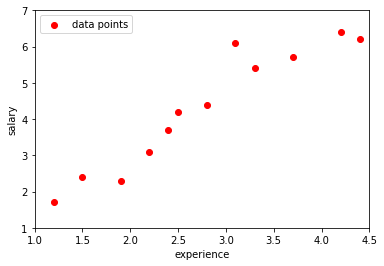

In [4]:
# plotting the data
plt.scatter(data.experience, data.salary, color = 'red', label = 'data points')
plt.xlim(1,4.5)
plt.ylim(1,7)
plt.xlabel('experience')
plt.ylabel('salary')
plt.legend()

## Starting the Line using small values of parameter

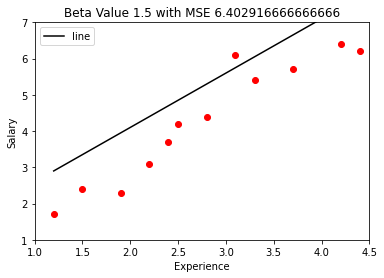

In [6]:
# making lines for different values of Beta 0.1,0.8,1.5
beta = 1.5

# keeping intercept constant
b = 1.1

# to store predicted points
line1 = []

# generating  predictions for every data points
for i in range(len(data)):
    line1.append(data.experience[i]*beta + b)

# Plotting the line
plt.scatter(data.experience, data.salary, color = 'red')
plt.plot(data.experience, line1, color = 'black', label = 'line')
plt.xlim(1,4.5)
plt.ylim(1,7)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
MSE = mse(data.experience, line1)
plt.title("Beta Value "+ str(beta)+' with MSE ' + str(MSE))
MSE = mse(data.experience, line1)

## Computation Cost Over a range of values of Beta

In [15]:
# function to calculate error
def Error(Beta, data):
    # b is constant
    b = 1.1
    
    salary = []
    experience = data.experience
    
    # Loop to calculate predict salary variables
    for i in range(len(data.experience)):
        tmp = data.experience[i] * Beta + b
        salary.append(tmp)
    MSE = mse(data.salary, salary)
    return MSE

In [16]:
# Range of slopes from 0 to 1.5 with increment of 0.01
slope = [i/100 for i in range(0,150)]
Cost = []
for i in slope:
    cost = Error(Beta = i, data = data)
    Cost.append(cost)

In [17]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'Beta' : slope,
    'Cost' : Cost
})
Cost_table.head()

,Beta,Cost
0,0.00,12.791667
1,0.01,12.585876
2,0.02,12.381806
3,0.03,12.179455
4,0.04,11.978824


## Visualising cost with respect to Beta

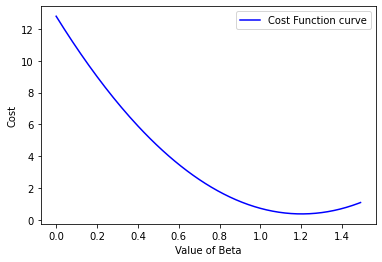

In [18]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.Beta, Cost_table.Cost, color = 'blue', label = 'Cost Function curve')
plt.xlabel('Value of Beta')
plt.ylabel('Cost')
plt.legend()